<a href="https://colab.research.google.com/github/KhachKara/TGU/blob/master/%D1%81%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%9A%D0%B0%D1%80%D0%B0%D0%BF%D0%B5%D1%82%D1%8F%D0%BD_%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%83%D1%80_%D0%97%D0%BE%D1%80%D0%B8%D0%BA%D0%BE%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Работа не закончена, она в процессе выполнения !!!

In [ ]:
# загружаеи по id csv из google disk
#!gdown --id 1AHKY5t_53eBTm3rHy8oIttwQijt7Dw55
!gdown --id 1PymN1H0rgS8BVuaKyFhusJiTloTjJwAD

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1PymN1H0rgS8BVuaKyFhusJiTloTjJwAD
To: /content/result roles (16.06.2022).csv
100% 445M/445M [00:04<00:00, 92.0MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import numpy as np

##region roles (26.05.22).csv
##result roles (16.06.2022).csv

In [ ]:
# создаем датасет для сравнения dataset1
# dataset1 = pd.read_csv('region roles (26.05.22).csv')

# создаем датасет для работы dataset2
dataset2 = pd.read_csv('result roles (16.06.2022).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6,12,23,46,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##получим список полей

In [ ]:
# получим список полей
dataset2.columns

Index(['Unnamed: 0', 'id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'area', 'salary', 'type', 'published_at',
       'created_at', 'archived', 'insider_interview', 'url', 'alternate_url',
       'relations', 'employer', 'snippet', 'schedule', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'description', 'experience', 'key_skills', 'specializations', 'region',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

##удаляем пустые, безимянные столбцы

In [ ]:
# удаляем пустые, безимянные столбцы
for i in dataset2.columns:
  if 'Unnamed: ' in i:
    del dataset2[i]
dataset2.columns

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'area', 'salary', 'type', 'published_at',
       'created_at', 'archived', 'insider_interview', 'url', 'alternate_url',
       'relations', 'employer', 'snippet', 'schedule', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'description', 'experience', 'key_skills', 'specializations', 'region'],
      dtype='object')

##размер датасет

In [ ]:
# размер датасет
dataset2.shape

(76382, 28)

##убираем дубликаты

In [ ]:
# убираем дубликаты
dataset2 = dataset2.drop_duplicates()
dataset2.shape

(76349, 28)

##количество пропусков по столбцам

In [ ]:
# количество пропусков по столбцам
for i in dataset2.columns:
  print(i, '---', len(dataset2[pd.isnull(dataset2[i])]))

id --- 0
premium --- 0
name --- 0
department --- 71447
has_test --- 2
response_letter_required --- 0
area --- 1
salary --- 35481
type --- 3
published_at --- 2
created_at --- 1
archived --- 2
insider_interview --- 75779
url --- 2
alternate_url --- 0
relations --- 1
employer --- 0
snippet --- 1
schedule --- 1
working_days --- 1
working_time_intervals --- 0
working_time_modes --- 0
accept_temporary --- 1
description --- 0
experience --- 0
key_skills --- 1
specializations --- 0
region --- 0


##количество не нулевых значений по столбцам через info()

In [ ]:
# количество не нулевых значений по столбцам через info()
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76349 entries, 0 to 76381
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        76349 non-null  int64 
 1   premium                   76349 non-null  bool  
 2   name                      76349 non-null  object
 3   department                4902 non-null   object
 4   has_test                  76347 non-null  object
 5   response_letter_required  76349 non-null  object
 6   area                      76348 non-null  object
 7   salary                    40868 non-null  object
 8   type                      76346 non-null  object
 9   published_at              76347 non-null  object
 10  created_at                76348 non-null  object
 11  archived                  76347 non-null  object
 12  insider_interview         570 non-null    object
 13  url                       76347 non-null  object
 14  alternate_url         

##фильтрация полей с наличием зарплаты

In [ ]:
# фильтрация полей с наличием зарплаты
salary_filter = ~pd.isnull(dataset2['salary'])
filtered_dataset_salary = dataset2[salary_filter]

##Замена кавычек и операторов в соответсвии синтаксису json

In [ ]:
# Замена кавычек и операторов в соответсвии синтаксису json

def replaceing(text):
  """
  Функция меняет одинарные кавычки на двойные, так же приводит булевые операторы 
  в соответьсьвие с синтаксисом json, меняет RUR на руб.
  Применить только к столбцу salary!
  """
  to_be_replaced = {'True': 'true', 
                    'False': 'false', 
                    'None': 'null', 
                    '\'': '"', 
                    'RUR': 'руб'}
  while True: 
    for i in to_be_replaced:
      text = re.sub(i, to_be_replaced[i], text)
    return text

filtered_dataset_salary['salary'].apply(replaceing)

4        {"from": 25000, "to": 50000, "currency": "руб"...
5        {"from": 45000, "to": 45000, "currency": "руб"...
8        {"from": 60000, "to": null, "currency": "руб",...
9        {"from": 60000, "to": null, "currency": "руб",...
10       {"from": 45000, "to": null, "currency": "руб",...
                               ...                        
76375    {"from": 45000, "to": null, "currency": "руб",...
76377    {"from": 30000, "to": null, "currency": "руб",...
76378    {"from": 40000, "to": null, "currency": "руб",...
76380    {"from": 40000, "to": null, "currency": "руб",...
76381    {"from": null, "to": 40300, "currency": "руб",...
Name: salary, Length: 40868, dtype: object

##поиск ошибочных данных в столбце salary

In [ ]:
# поиск ошибочных данных в столбце salary
_ = filtered_dataset_salary['salary'].apply(replaceing)#.head()
cleaned_dataset_by_salary = pd.DataFrame()
to_be_droped = []
i = 0
while i < len(_.index):
    if "from" not in (_.iloc[i]):
        to_be_droped.append(_.index[i])
        #print(i, _.index[i], "from" in (_.iloc[i]))
    i += 1
cleaned_dataset_by_salary = _.drop(to_be_droped)
cleaned_dataset_by_salary

4        {"from": 25000, "to": 50000, "currency": "руб"...
5        {"from": 45000, "to": 45000, "currency": "руб"...
8        {"from": 60000, "to": null, "currency": "руб",...
9        {"from": 60000, "to": null, "currency": "руб",...
10       {"from": 45000, "to": null, "currency": "руб",...
                               ...                        
76375    {"from": 45000, "to": null, "currency": "руб",...
76377    {"from": 30000, "to": null, "currency": "руб",...
76378    {"from": 40000, "to": null, "currency": "руб",...
76380    {"from": 40000, "to": null, "currency": "руб",...
76381    {"from": null, "to": 40300, "currency": "руб",...
Name: salary, Length: 40864, dtype: object

##создания датасета salary загрузка длится около 5 мин

In [ ]:
# создания датасета salary загрузка длится около 5 мин
new_df_with_salary = pd.DataFrame(columns=['salary_index', 'salary_from', 'salary_to', 'salary_currency', 'salary_gross'])
f, t, c, g = '', '', '', ''
for i in cleaned_dataset_by_salary.index:
    _ = re.sub("[{|}|'|\"]","", cleaned_dataset_by_salary[i])
    __ = re.split(', ', _)
    temp = []
    temp_df = pd.DataFrame(columns=['salary_index', 'salary_from', 'salary_to', 'salary_currency', 'salary_gross'])
    temp.append(i)
    if 'from' in __[0]:
        f = __[0][6:]
        temp.append(f)
    if "to" in __[1]:
        t = __[1][4:]
        temp.append(t)
    if "currency" in __[2]:
        c = __[2][10:]
        temp.append(c)
    if "gross" in __[3]:
        g = __[3][7:]
        temp.append(g)
    row = pd.Series(temp, index=temp_df.columns)
    new_df_with_salary = new_df_with_salary.append(row, ignore_index=True )

##резервная копия new_df_with_salary

In [ ]:
# резервная копия new_df_with_salary
correct_df_with_salary = new_df_with_salary

##преоброзование в int колонки salary_index

In [ ]:
# преоброзование в int колонки salary_index
correct_df_with_salary['salary_index'] = correct_df_with_salary['salary_index'].astype(int)

##создаем пустые колонки в конечном датасете и заполняем NaN

In [ ]:
# создаем пустые колонки в конечном датасете и заполняем NaN
final_dataset = dataset2
final_dataset['salary_from'] = 'NaN'
final_dataset['salary_to'] = 'NaN'
final_dataset['salary_currency'] = 'NaN'
final_dataset['salary_gross'] = 'NaN'

##заливаем данные из correct_df_with_salary в final_dataset грузит около 2 мин

In [ ]:
# заливаем данные из correct_df_with_salary в final_dataset грузит около 2 мин
j = 0
for i in range(len(final_dataset)):
    if i in correct_df_with_salary['salary_index'].values:
        final_dataset['salary_from'].loc[i] = correct_df_with_salary['salary_from'].loc[j]
        final_dataset['salary_to'].loc[i] = correct_df_with_salary['salary_to'].loc[j]
        final_dataset['salary_currency'].loc[i] = correct_df_with_salary['salary_currency'].loc[j]
        final_dataset['salary_gross'].loc[i] = correct_df_with_salary['salary_gross'].loc[j]
        j += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##перевод столбцов в числовой тип

In [ ]:
# перевод столбцов в числовой тип
# final_dataset['salary_from'] = pd.to_numeric(final_dataset['salary_from'], errors='coerce')
final_dataset['salary_from'] = pd.to_numeric(final_dataset['salary_from'], errors='coerce').astype('Int64')

# final_dataset['salary_to'] = pd.to_numeric(final_dataset['salary_to'], errors='coerce')
final_dataset['salary_to'] = pd.to_numeric(final_dataset['salary_to'], errors='coerce').astype('Int64')

##фильтр убирающая пустые ячейки salary_from и salary_to

In [ ]:
# фильтр убирающая пустые ячейки
filter1 = ~pd.isnull(final_dataset['salary_from']) | ~pd.isna(final_dataset['salary_from'])
filter2 = ~pd.isnull(final_dataset['salary_to']) | ~pd.isna(final_dataset['salary_to'])
final_dataset[filter1][filter2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18058 entries, 4 to 76348
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        18058 non-null  int64 
 1   premium                   18058 non-null  bool  
 2   name                      18058 non-null  object
 3   department                302 non-null    object
 4   has_test                  18058 non-null  object
 5   response_letter_required  18058 non-null  object
 6   area                      18058 non-null  object
 7   salary                    18058 non-null  object
 8   type                      18058 non-null  object
 9   published_at              18058 non-null  object
 10  created_at                18058 non-null  object
 11  archived                  18058 non-null  object
 12  insider_interview         20 non-null     object
 13  url                       18058 non-null  object
 14  alternate_url         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


## salary_from

In [ ]:
final_dataset['salary_from']

0         <NA>
1         <NA>
2         <NA>
3         <NA>
4        25000
         ...  
76377     <NA>
76378     <NA>
76379     <NA>
76380     <NA>
76381     <NA>
Name: salary_from, Length: 76349, dtype: Int64

## salary_to

In [ ]:
final_dataset['salary_to']

0         <NA>
1         <NA>
2         <NA>
3         <NA>
4        50000
         ...  
76377     <NA>
76378     <NA>
76379     <NA>
76380     <NA>
76381     <NA>
Name: salary_to, Length: 76349, dtype: Int64

## name

In [ ]:
# наименований всех вакансий в датасете - name
vacancies = final_dataset['name'].values

In [ ]:
final_dataset['name'].value_counts()

Системный администратор                                             1887
Программист 1С                                                      1254
Менеджер по персоналу                                                699
Системный аналитик                                                   564
Менеджер по подбору персонала                                        549
                                                                    ... 
HR менеджер в единственном лице                                        1
Ведущий специалист отдела подбора и адаптации (Executive Search)       1
HR Business Partner/HR Director (Рига, Москва)                         1
Младший HR менеджер / Младший специалист по адаптации персонала        1
Начальник бюро подбора персонала                                       1
Name: name, Length: 34131, dtype: int64

In [ ]:
# print(len(set(vacancies)))
# set(vacancies)

## regions list

In [ ]:
regions_list = ['Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Еврейская АО',
 'Забайкальский край',
 'Ивановская область',
 'Иркутская область',
 'КИНГФИТ&quot',
 'Кабардино-Балкарская республика',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Карачаево-Черкесская Республика',
 'Кемеровская область',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Москва',
 'Московская область',
 'Мурманская область',
 'Ненецкий АО',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',
 'Пермский край',
 'Приморский край',
 'Псковская область',
 'Республика Адыгея',
 'Республика Алтай',
 'Республика Башкортостан',
 'Республика Бурятия',
 'Республика Дагестан',
 'Республика Ингушетия',
 'Республика Калмыкия',
 'Республика Карелия',
 'Республика Коми',
 'Республика Крым',
 'Республика Марий Эл',
 'Республика Мордовия',
 'Республика Саха (Якутия)',
 'Республика Северная Осетия-Алания',
 'Республика Татарстан',
 'Республика Тыва',
 'Республика Хакасия',
 'Ростовская область',
 'Рязанская область',
 'Самарская область',
 'Санкт-Петербург',
 'Саратовская область',
 'Сахалинская область',
 'Свердловская область',
 'Смоленская область',
 'Ставропольский край',
 'Тамбовская область',
 'Тверская область',
 'Томская область',
 'Тульская область',
 'Тюменская область',
 'Удмуртская Республика',
 'Ульяновская область',
 'Фантазия&quot',
 'Хабаровский край',
 'Ханты-Мансийский АО - Югра',
 'Челябинская область',
 'Чеченская республика',
 'Чувашская Республика',
 'Чукотский АО',
 'Ямало-Ненецкий АО',
 'Ярославская область']

##region

In [ ]:
filter_reg = ~final_dataset['region'].str.contains('\[\<', regex=True)
temp_reg = final_dataset[filter_reg]

In [ ]:
# наименований всех регионов в датасете - region
pd.DataFrame(regions_list, columns=['Район']).value_counts()

Район                
Алтайский край           1
Республика Марий Эл      1
Рязанская область        1
Ростовская область       1
Республика Хакасия       1
                        ..
Ленинградская область    1
Курская область          1
Курганская область       1
Красноярский край        1
Ярославская область      1
Length: 86, dtype: int64

## area

In [ ]:
# наименований всех городов в датасете - area
areas_list = []
areas = final_dataset['area']
for i in range(len(final_dataset)):
    try:
        areas_list.append(eval(areas.iloc[i])['name'])
    except:
        pass

In [ ]:
pd.DataFrame(areas_list, columns=['Город']).value_counts()

Город                      
Москва                         21831
Санкт-Петербург                 8956
Екатеринбург                    2660
Новосибирск                     2630
Казань                          2187
                               ...  
Полтавка                           1
Полотняный Завод                   1
Полесск                            1
Крапивна (Тульская область)        1
Благодарный                        1
Length: 1181, dtype: int64

## published_at

In [ ]:
# наименований всех дат в датасете - published_at
final_dataset['published_at']

0        2022-03-28T09:08:00+0300
1        2022-04-01T08:52:06+0300
2        2022-03-29T15:20:02+0300
3        2022-03-29T15:37:33+0300
4        2022-04-07T12:35:39+0300
                   ...           
76377    2022-04-04T11:00:58+0300
76378    2022-04-05T09:04:24+0300
76379    2022-04-06T11:28:24+0300
76380    2022-04-06T13:45:57+0300
76381    2022-04-11T18:05:36+0300
Name: published_at, Length: 76349, dtype: object

##key_skills

In [ ]:
try:
    filter_key = ~final_dataset['key_skills'].astype(str).str.contains('\<', regex=True)
except:
    print(final_dataset['key_skills'])

In [ ]:
# наименований всех навыков в датасете - key_skills
key_skills = []
for i in final_dataset['key_skills'][filter_key]:
    try:
        for j in eval(i):
            key_skills.append(j['name'])
    except:
        pass

In [ ]:
pd.DataFrame(key_skills, columns=['Навыки']).value_counts()

Навыки                                                                                             
Работа в команде                                                                                       8522
SQL                                                                                                    7322
Грамотная речь                                                                                         6979
Linux                                                                                                  5348
Git                                                                                                    5149
                                                                                                       ... 
enterprise                                                                                                1
entity framework core                                                                                     1
es5                                 

##specialization

In [ ]:
filter_spec = ~final_dataset['specializations'].str.contains('<', regex=False)
temp_spec = final_dataset[filter_spec]

In [ ]:
# наименований всех спецальностей в датасете - specialization.profarea_name
specializations = []
for i in range(len(final_dataset['specializations'].values)):
    try:
        for j in eval(temp_spec['specializations'].iloc[i]):
            specializations.append(j['profarea_name'])
    except:
        # print(i)
        pass

In [ ]:
list_spec_df = pd.DataFrame(specializations, columns=['Специальность'])
list_spec_df.value_counts()

Специальность                                        
Информационные технологии, интернет, телеком             202979
Управление персоналом, тренинги                           32402
Продажи                                                   25604
Маркетинг, реклама, PR                                    22079
Консультирование                                          13913
Строительство, недвижимость                                7735
Искусство, развлечения, масс-медиа                         3273
Спортивные клубы, фитнес, салоны красоты                   1720
Высший менеджмент                                          1560
Начало карьеры, студенты                                    768
Банки, инвестиции, лизинг                                   321
Производство, сельское хозяйство                            320
Административный персонал                                   293
Бухгалтерия, управленческий учет, финансы предприятия       146
Безопасность                                      

##employer

In [ ]:
employer = []

In [ ]:
for i in range(len(final_dataset['employer'].values)):
    try:
        employer.append(eval(final_dataset['employer'].iloc[i])['name'])
    except:
        pass
list_employer_df = pd.DataFrame(employer, columns=['Работадатель'])

In [ ]:
list_employer_df.value_counts()

Работадатель 
Яндекс           1758
Ростелеком        577
Газпром нефть     528
Тинькофф          509
Сбербанк          497
                 ... 
ИВЦ ЖКХ и ТЭК       1
ИГИИС               1
ИГРО                1
ИГТЕЛ               1
“Куб Бьюти”         1
Length: 20609, dtype: int64

## Какова средняя зарплата по специальностям?


In [ ]:
specializations # специальности
final_dataset[['salary_from', 'salary_to']].dropna()

,salary_from,salary_to
4,25000,50000
5,45000,45000
11,60000,150000
13,80000,120000
15,30000,90000
...,...,...
76329,40000,60000
76332,180000,220000
76342,30000,35000
76345,35000,45000


In [ ]:
indexes = []
values = []
for i in range(len(list_spec_df.value_counts())):
    indexes.append(list_spec_df.value_counts().index[i][0])
    


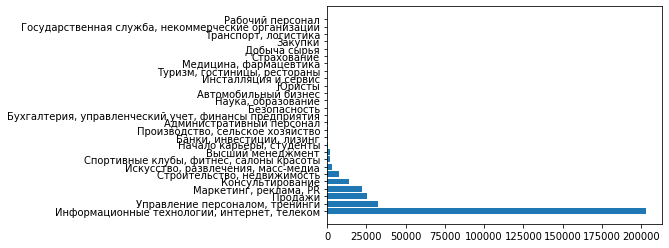

In [ ]:
plt.barh(indexes, list_spec_df.value_counts().values)
plt.show()

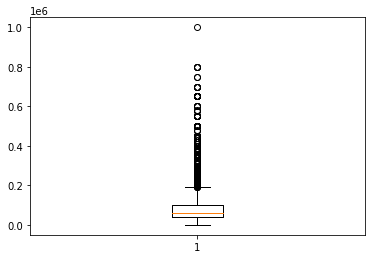

In [ ]:
zarplata = final_dataset['salary_from']
zarplata_dropna = zarplata.dropna()
plt.boxplot(zarplata_dropna)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

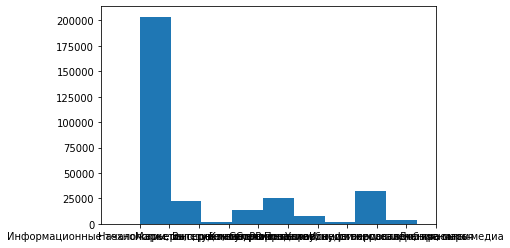

In [ ]:
plt.hist(specializations, bins=25)
plt.xlim((None, 10))
plt.show

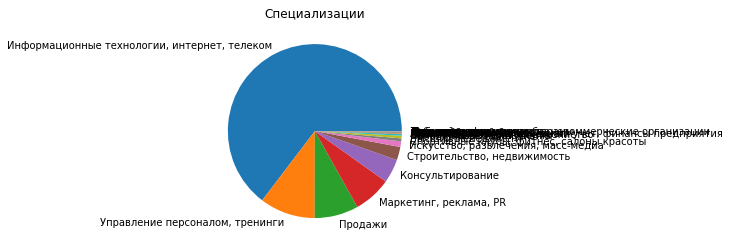

In [ ]:
spec_counts = pd.Series(specializations).value_counts()
plt.pie(spec_counts.values, labels=spec_counts.index)
plt.title('Специализации')
plt.show()

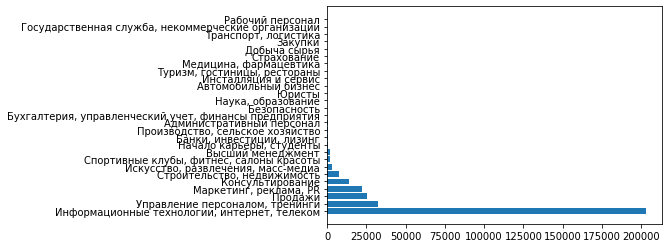

In [ ]:
plt.barh(spec_counts.index, spec_counts.values)
plt.show()